In [1]:
import os
os.chdir('..') #necessary to go one level up to the root directory to find dfm_tools
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
import dfm_tools as dfmt
try: #0.3.1 release
    from hydrolib.core.io.bc.models import ForcingModel
    from hydrolib.core.io.polyfile.models import PolyFile
except: #main branch and next release #TODO: move to easy imports after https://github.com/Deltares/HYDROLIB-core/issues/410
    from hydrolib.core.io.dflowfm.bc.models import ForcingModel
    from hydrolib.core.io.dflowfm.polyfile.models import PolyFile

dir_testinput = r'c:\DATA\dfm_tools_testdata'

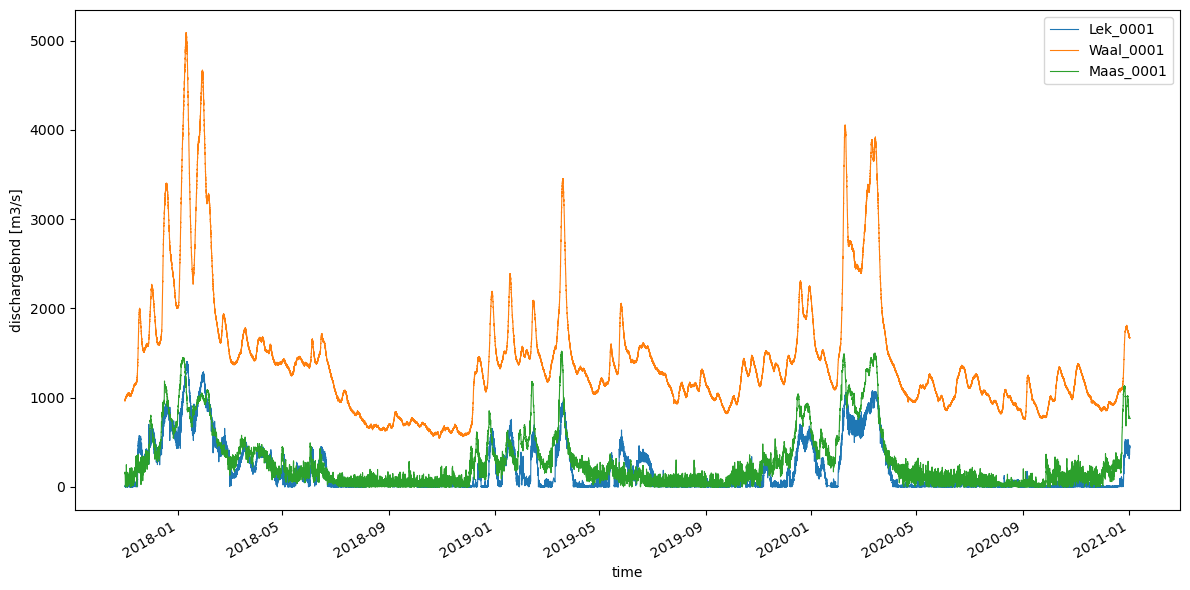

In [2]:
file_bc = r'p:\11208053-004-kpp2022-rmm1d2d\C_Work\09_Validatie2018_2020\dflowfm2d-rmm_vzm-j19_6-v2d\boundary_conditions\rmm_rivdis_meas_20171101_20210102_MET.bc'
#Load .bc-file using HydroLib object ForcingModel.
m = ForcingModel(Path(file_bc))
ForcingModel_object_out = ForcingModel()

fig, ax = plt.subplots(figsize=(12, 6))
for iFO, forcingobj in enumerate(m.forcing): #loop over three timeseries in bcfile/ForingModel
    forcing_xr = dfmt.forcinglike_to_Dataset(forcingobj, convertnan=True)
    #forcing_ts = dfmt.Dataset_to_TimeSeries(forcing_xr)
    forcing_xr['dischargebnd'].plot(ax=ax, label=forcing_xr['dischargebnd'].attrs['name'], linewidth=0.8)
ax.legend(loc=1)
fig.tight_layout()


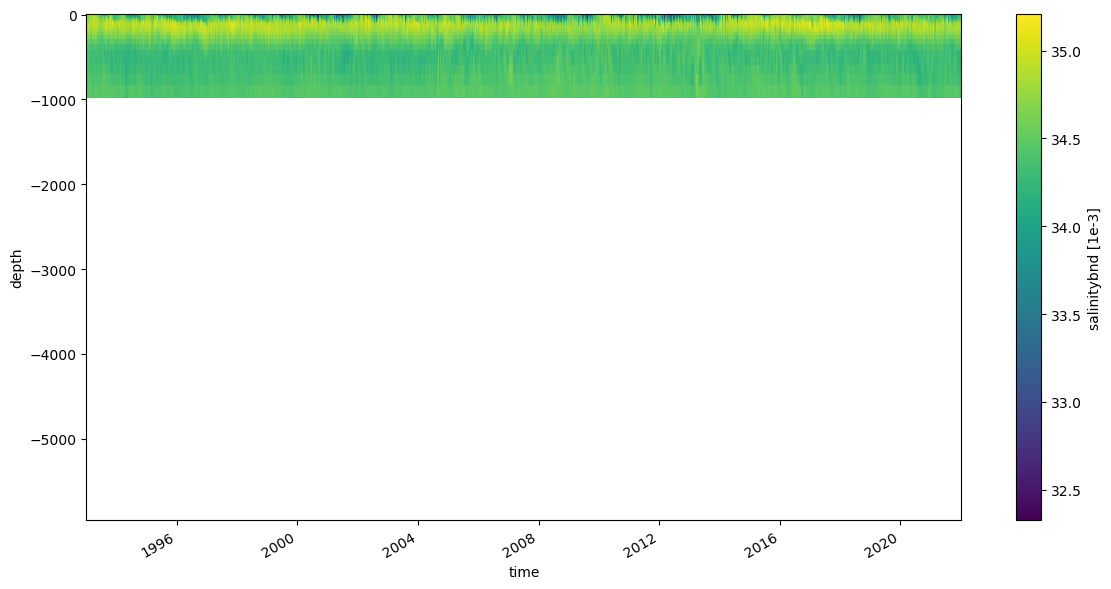

In [3]:
file_bc = r'c:\DATA\dfm_tools_testdata\hydrolib_bc\haixia\salinity_bc_South_v2_firstpoint.bc'
#Load .bc-file using HydroLib object ForcingModel.
m = ForcingModel(Path(file_bc))
ForcingModel_object_out = ForcingModel()

fig, ax = plt.subplots(figsize=(12, 6))
forcing_xr = dfmt.forcinglike_to_Dataset(m.forcing[0], convertnan=True)
#forcing_ts = dfmt.Dataset_to_T3D(forcing_xr)
forcing_xr['salinitybnd'].T.plot(ax=ax)
fig.tight_layout()


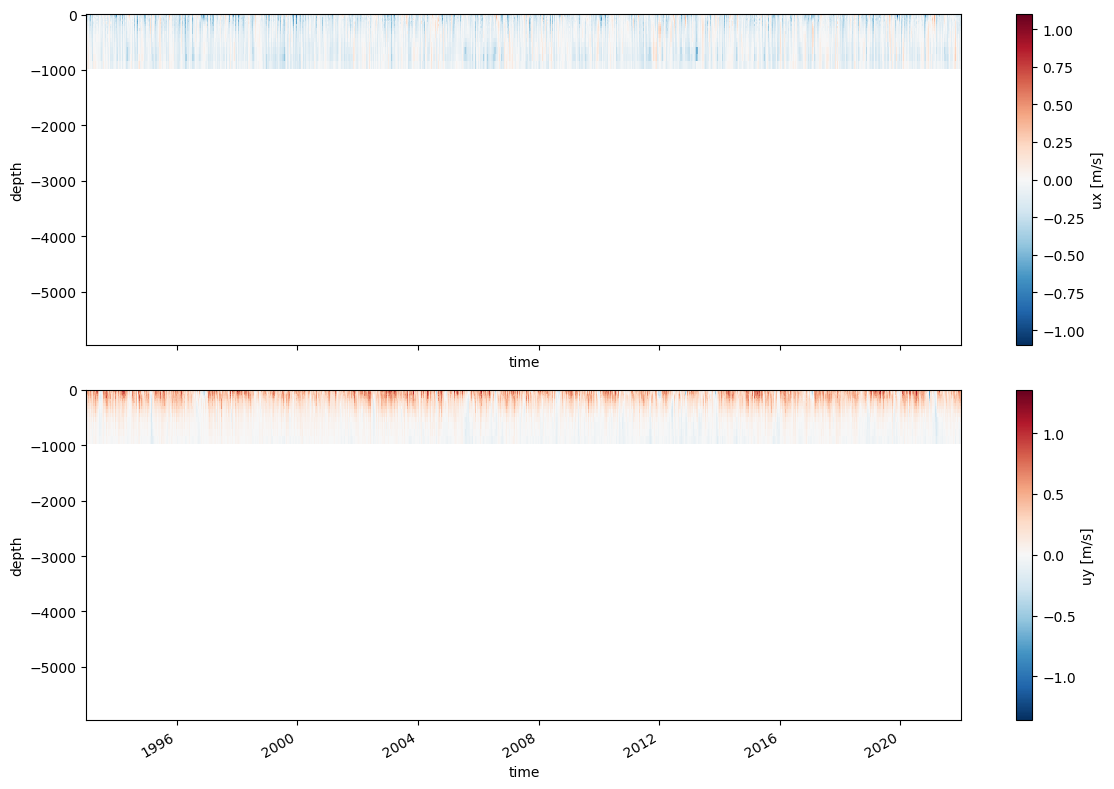

In [4]:
file_bc = r'c:\DATA\dfm_tools_testdata\hydrolib_bc\haixia\uxuy_bc_South_v2_firstpoint.bc'
#Load .bc-file using HydroLib object ForcingModel.
m = ForcingModel(Path(file_bc))
ForcingModel_object_out = ForcingModel()

fig, axes = plt.subplots(2,1,figsize=(12, 8),sharex=True,sharey=True)
forcing_xr = dfmt.forcinglike_to_Dataset(m.forcing[0], convertnan=True)
#forcing_ts = dfmt.Dataset_to_T3D(forcing_xr)
forcing_xr['ux'].T.plot(ax=axes[0])
forcing_xr['uy'].T.plot(ax=axes[1])
fig.tight_layout()


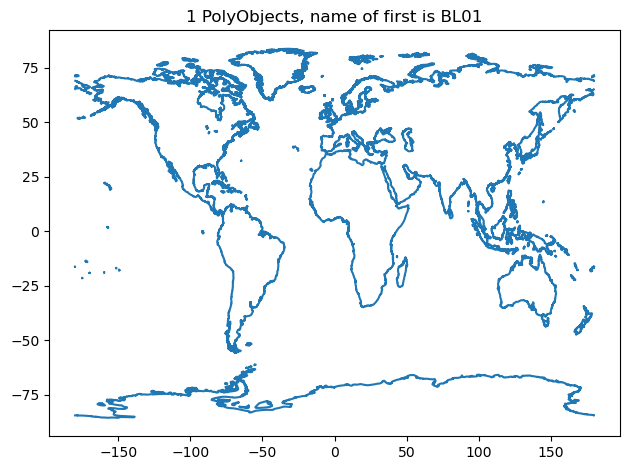

In [5]:
file_pli = Path(dir_testinput,'world.ldb')
#load pol/tek/pli/ldb file WITH HYDROLIB
polyfile_object = PolyFile(file_pli)
fig,ax = plt.subplots()
for iPO, pli_PolyObject_sel in enumerate(polyfile_object.objects):
    polyobject_pd = dfmt.pointlike_to_DataFrame(pli_PolyObject_sel)
    polyobject_pd[polyobject_pd==999.999] = np.nan #for world.ldb
    ax.set_title(f'{len(polyfile_object.objects)} PolyObjects, name of first is {pli_PolyObject_sel.metadata.name}')
    ax.plot(polyobject_pd['x'],polyobject_pd['y'])
fig.tight_layout()


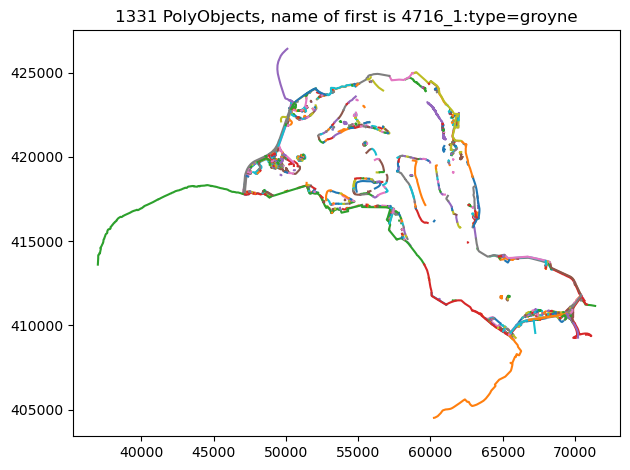

In [6]:
file_pli = Path(dir_testinput,'DFM_3D_z_Grevelingen\\geometry\\structures\\Grevelingen-FM_BL_fxw.pliz')
#load pol/tek/pli/ldb file WITH HYDROLIB
polyfile_object = PolyFile(file_pli)
fig,ax = plt.subplots()
for iPO, pli_PolyObject_sel in enumerate(polyfile_object.objects):
    polyobject_pd = dfmt.pointlike_to_DataFrame(pli_PolyObject_sel)
    ax.set_title(f'{len(polyfile_object.objects)} PolyObjects, name of first is {pli_PolyObject_sel.metadata.name}')
    ax.plot(polyobject_pd['x'],polyobject_pd['y'])
fig.tight_layout()


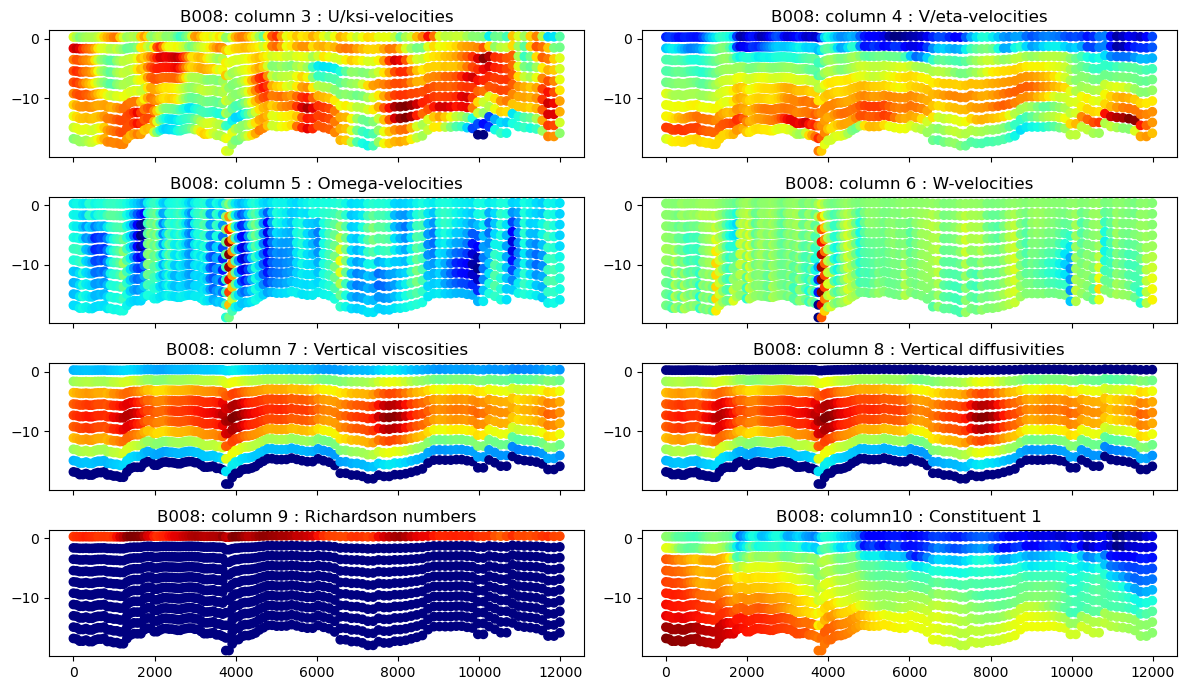

In [7]:
file_pli = Path(dir_testinput,r'ballenplot\SDS-zd003b5dec2-sal_2D.tek')
#load pol/tek/pli/ldb file WITH HYDROLIB
polyfile_object = PolyFile(file_pli)
fig,ax = plt.subplots(4,2,figsize=(12,7),sharex=True)
for iPO, pli_PolyObject_sel in enumerate(polyfile_object.objects):
    polyobject_pd = dfmt.pointlike_to_DataFrame(pli_PolyObject_sel)
    content_str = pli_PolyObject_sel.description.content
    for colno in range(8):
        ax.flatten()[colno].scatter(polyobject_pd['x'],polyobject_pd['y'],c=polyobject_pd[colno],cmap='jet')
        colmeta = content_str.split('\n')[colno+5]
        ax.flatten()[colno].set_title(f'{pli_PolyObject_sel.metadata.name}: {colmeta}')
fig.tight_layout()


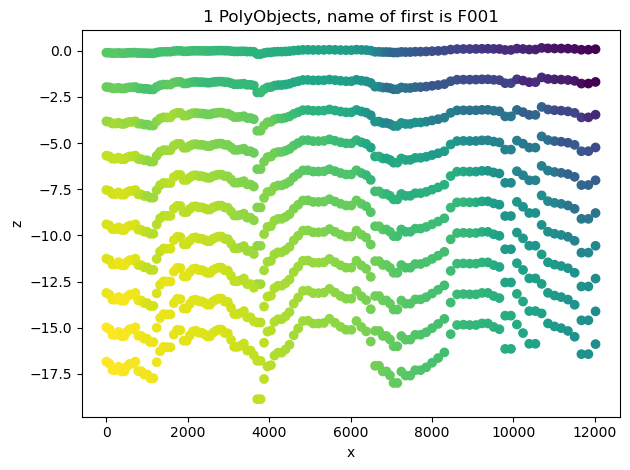

In [8]:
file_pli = Path(dir_testinput,r'ballenplot\0200a_2D.tek')
#load pol/tek/pli/ldb file WITH HYDROLIB
polyfile_object = PolyFile(file_pli)
fig,ax = plt.subplots()
for iPO, pli_PolyObject_sel in enumerate(polyfile_object.objects):
    polyobject_pd = dfmt.pointlike_to_DataFrame(pli_PolyObject_sel)
    ax.set_title(f'{len(polyfile_object.objects)} PolyObjects, name of first is {pli_PolyObject_sel.metadata.name}')
    ax.scatter(polyobject_pd['x'],polyobject_pd[0],c=polyobject_pd[1])
    ax.set_xlabel('x')
    ax.set_ylabel('z')
fig.tight_layout()


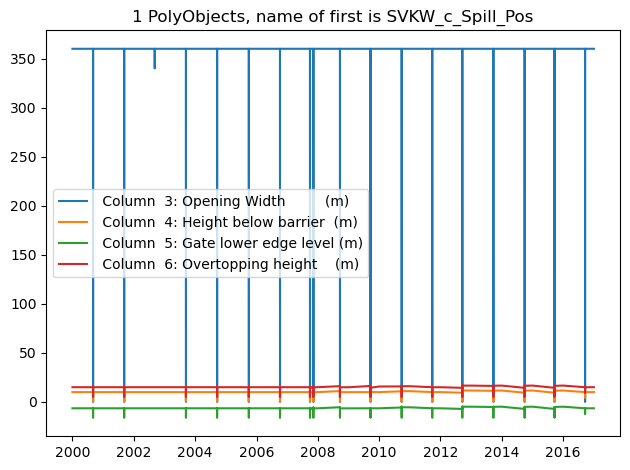

In [9]:
file_pli = Path(dir_testinput,r'Maeslant.tek')
#load pol/tek/pli/ldb file WITH HYDROLIB
polyfile_object = PolyFile(file_pli)
fig,ax = plt.subplots()
for iPO, pli_PolyObject_sel in enumerate(polyfile_object.objects):
    polyobject_pd = dfmt.pointlike_to_DataFrame(pli_PolyObject_sel)
    ax.set_title(f'{len(polyfile_object.objects)} PolyObjects, name of first is {pli_PolyObject_sel.metadata.name}')
    polyobject_pd_timeidx = dfmt.parse_xy_to_datetime(polyobject_pd)
    ax.plot(polyobject_pd_timeidx)
    ax.legend(pli_PolyObject_sel.description.content.split('\n')[2:])
fig.tight_layout()


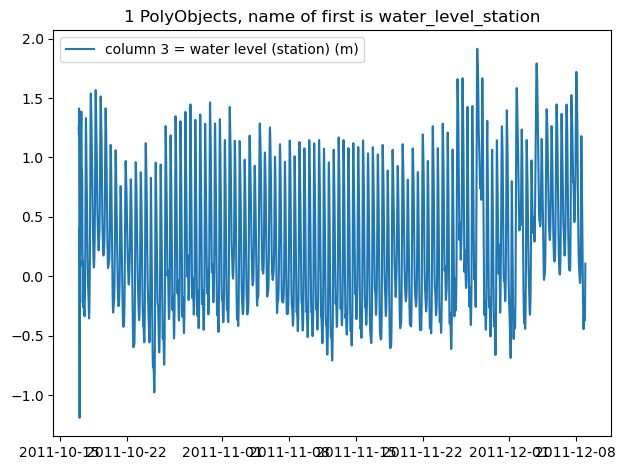

In [10]:
file_pli = Path(dir_testinput,r'ballenplot\nima-1013-lo-wl_validname.tek')
#load pol/tek/pli/ldb file WITH HYDROLIB
polyfile_object = PolyFile(file_pli)
fig,ax = plt.subplots()
for iPO, pli_PolyObject_sel in enumerate(polyfile_object.objects):
    polyobject_pd = dfmt.pointlike_to_DataFrame(pli_PolyObject_sel)
    ax.set_title(f'{len(polyfile_object.objects)} PolyObjects, name of first is {pli_PolyObject_sel.metadata.name}')
    polyobject_pd_timeidx = dfmt.parse_xy_to_datetime(polyobject_pd)
    ax.plot(polyobject_pd_timeidx)
    ax.legend(pli_PolyObject_sel.description.content.split('\n')[2:])
fig.tight_layout()
